# Fashion MNIST

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load data first way
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [14]:
(x_train, y_train), (x_test, y_test) = tfds.as_numpy(tfds.load('fashion_mnist',
                                                               split=['train', 'test'],
                                                               batch_size=-1,
                                                               as_supervised=True,
                                                               shuffle_files=True))

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [15]:
# Number of classes
classes = len(set(y_train))
classes

10

In [20]:
# Build a neural network (Functional API)
i = tf.keras.layers.Input(shape=x_train[0].shape)
x = tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(classes, activation="softmax")(x)

model_1 = tf.keras.Model(i, outputs)

# Compile the model
model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [21]:
# Fit the model
r = model_1.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 37s 19ms/step - loss: 0.5275 - accuracy: 0.8067 - val_loss: 0.4143 - val_accuracy: 0.8410
Epoch 2/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3660 - accuracy: 0.8623 - val_loss: 0.3385 - val_accuracy: 0.8744
Epoch 3/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3166 - accuracy: 0.8796 - val_loss: 0.3217 - val_accuracy: 0.8792
Epoch 4/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2815 - accuracy: 0.8941 - val_loss: 0.3040 - val_accuracy: 0.8906
Epoch 5/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2550 - accuracy: 0.9035 - val_loss: 0.3020 - val_accuracy: 0.8931
Epoch 6/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2360 - accuracy: 0.9108 - val_loss: 0.2972 - val_accuracy: 0.8940
Epoch 7/15
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2148 - accuracy: 0.9190 - val_loss: 0.3092 -

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

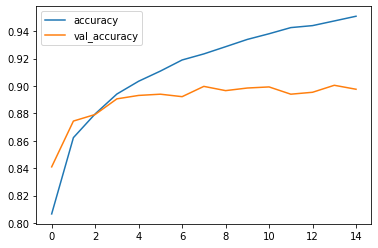

In [24]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)

  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

p_test = model_1.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
print(cm)

# plot the data
plot_cm(y_test, p_test)

313/313 [==============================] - 2s 6ms/step
[[894   0  21  13   3   2  65   0   2   0]
 [  4 974   0  12   3   1   4   0   2   0]
 [ 32   0 835   9  70   0  52   0   2   0]
 [ 20   4  15 903  33   0  24   0   1   0]
 [  1   0  54  13 861   1  70   0   0   0]
 [  0   0   0   2   0 968   0  20   0  10]
 [150   0  66  20  97   0 651   0  16   0]
 [  0   0   0   0   0  11   0 978   0  11]
 [  7   0   1   2   3   3   3   2 979   0]
 [  1   0   0   0   0   7   0  59   0 933]]
